# DataGym
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не знаем)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head().T

,0,1,2,3,4
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке


## Объединим две выборки

Так как пока мы пока не умеем работать со sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train['sample'] = 'train'
df_test['sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns:                  # перебираем все столбцы
    if str(df_train[i].dtype) == 'object':  # если тип столбца - object
        print('='*10)
        print(i)                            # выводим название столбца
        print(set(df_train[i]))             # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n')                         # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Строительство', 'Развлечения/Искусство', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Торговля', 'Информационные технологии', 'Подбор персонала', 'Сельское хозяйство', 'Образование', 'Юридические услуги/нотариальные услуги', 'Туризм', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Управляющая компания', 'Здравоохранение', 'Логистика', 'Другие сферы', 'Государственная служба', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Салоны красоты и здоровья', 'Наука', 'Транспорт', 'Химия/Парфюмерия/Фармацевтика', 'Энергетика', 'Недвижимость'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float');
# так это исправляется, но результат не записывается никуда)

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Заполните их нулями

In [15]:
df.info() 
# пропуски есть в восьми столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [16]:
df.fillna(0).info() # можно заполнить нулями следующим образом, сохраним результат позже

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. В данных есть признаки, которые можно назвать категориальным, например семейный статус
 {'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}
 и таких много
#### Закодируйте их числами (например идентификаторами 1, 2, 3, ... )
#### Можно иначе, если есть идеи как.

 Ответ:
 
 Всего категориальных столбцов в датасете 13, а также sample:
 
- EDUCATION
- MARITAL_STATUS
- GEN_INDUSTRY
- GEN_TITLE
- ORG_TP_STATE
- ORG_TP_FCAPITAL
- JOB_DIR
- FAMILY_INCOME
- REG_ADDRESS_PROVINCE
- FACT_ADDRESS_PROVINCE
- POSTAL_ADDRESS_PROVINCE
- TP_PROVINCE
- REGION_NM
- sample

Закодируем их от 1 до m, где m - количество возможных значений столбца (в том числе sample для единообразия). Реализация приведена в функции preprocess_data в рамках Задания №3 ниже.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками (см задание 1)
* Кодировала категориальные признаки (см задание 2) Если закодировать признаки вам не удалось - удалите все что не числа

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preprocess_data(df_input):
    df_output = df_input.copy()
    
    # удаляеим идентификатор AGREEMENT_RK
    df_output = df_output.drop('AGREEMENT_RK', axis=1)
    
    # избавляемся от '.' и ',', преобразуем к float из ошибочно определенного типа object
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

    
    # кодируем категориальные признаки числами от 1 до кол-ва возможных уникальных значений признака, с шагом 1,
    # при этом пропуски будут кодироваться нулями:
    for column in df_output.columns:
        if str(df_output[column].dtype) == 'object':
            
            if df_output[column].isna().any():
                start = 0  # если в столбце был пропуск, не нумеруем его, закодируем нулем позже
            else:
                start = 1 # если пропусков не было, просто нумеруем все значения с единицы
            
            values_to_encode = set(df_output[column]) # все возможные уникальные значения признака

            # создаем словарь, где ключом является значение признака, 
            # а значением - его кодировка (= порядковый номер в списке возможных значений values_to_encode)
            values_dict = dict(zip(
                                    values_to_encode, 
                                    range(start, len(values_to_encode)+1)
                                   )
                                )
            
            # перекодируем столбец в соответствие с созданным словарем, NaN кодируется нулем
            df_output[column] = df_output[column].map(values_dict)

            # сохраняем кодировку в файл label_encoding.csv, чтобы не забыть, каким значением что закодировано
            with open('label_encoding.csv', 'a', encoding='utf-8') as file:
                file.write('======'+ column + '=====\n')
                for key in values_dict.keys():
                    file.write("%s,%s\n"%(key, values_dict[key]))
                    
    # заменяем пропуски нулями во всем датасете
    df_output.fillna(0, inplace=True)
            
    return df_output

In [18]:
df_preproc = df.pipe(preprocess_data)

In [19]:
df_preproc.info()
# все пропуски заполнены, все столбцы численные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null int64
FACT_ADDRESS_PROVINCE 

#### Задание 4. Выше мы собрали данные в один датафрейм и записали столбец sample, чтоб было видно где что осталось.
#### ... напишите код, который разделит df_preproc на 2 части train и test (записав в df_train_preproc и df_test_preproc соответственно)
#### ... удалив колонку sample

In [20]:
# в получившейся кодировке test -> 1, train -> 2, делим выборки на основании нового значения признака
df_test_preproc = df_preproc[df_preproc['sample']==1]
df_train_preproc = df_preproc[df_preproc['sample']==2]

#### Задание 5. Отделите целевую переменную и остальные признаки (речь не про train_test_split)
Выше у вас получились матрицы df_train_preproc и df_test_preproc

Должно получиться:
* 2 матрицы: X и X_valid
* 2 вектора: y и y_valid


* где X - все данные df_train_preproc, кроме TARGET
* где X_valid - все данные df_test_preproc, кроме TARGET
* где y - TARGET от df_train_preproc
* где y_valid - TARGET от df_test_preproc

In [21]:
X = df_train_preproc.drop('TARGET', axis=1)
X_valid = df_test_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']
y_valid = df_test_preproc['TARGET']

#### Задание 6. Обучение и оценка качества разных моделей

In [22]:
# Поделите данные X и y на 2 части (train и test, размером от исходного 70% и 30% соответственно)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.3)

In [23]:
# Попробовать следующие "черные ящики": интерфейс у всех одинаковый 
# Постепенно мы узнаем, что они делают, а сейчас учимся выбирать? какой работает качественнее
#     fit, 
#     predict
# записав предсказания в pred_1, pred_2, pred_3

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1')
lr.fit(X_train, y_train) # обучаем модель (логистическая регрессия)
pred_1 = lr.predict(X_test) # выдаем ответ

forest = RandomForestClassifier()
forest.fit(X_train, y_train) # обучаем модель (случайный лес)
pred_2 = forest.predict(X_test) # выдаем ответ

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train) # обучаем модель (дерево принятия решений)
pred_3 = tree.predict(X_test) # выдаем ответ


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
# Посчитать метрики стандартные
# accuracy, precision, recall, F1
# в pred_1, pred_2, pred_3 у вас должны лежать предсказания разных "ящиков"
# посчитайте метрики для каждого

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
lr_metrics = accuracy_score(y_test, pred_1), \
precision_score(y_test, pred_1), \
recall_score(y_test, pred_1), \
f1_score(y_test, pred_1)

In [26]:
forest_metrics = accuracy_score(y_test, pred_2), \
precision_score(y_test, pred_2), \
recall_score(y_test, pred_2), \
f1_score(y_test, pred_2)

In [27]:
tree_metrics = accuracy_score(y_test, pred_3), \
precision_score(y_test, pred_3), \
recall_score(y_test, pred_3), \
f1_score(y_test, pred_3)

In [28]:
# Визуализровать эти метрики всех моделей на одном графике (чтоб визуально сравнить  качество)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

# создадим DataFrame, где каждой модели соответствуют значения каждой из метрик
df_metrics = pd.DataFrame(
    [lr_metrics, forest_metrics, tree_metrics], 
    columns = ['accuracy', 'precision', 'recall', 'F1'],
    index = ['logistic regression', 'random forest', 'decision tree'])

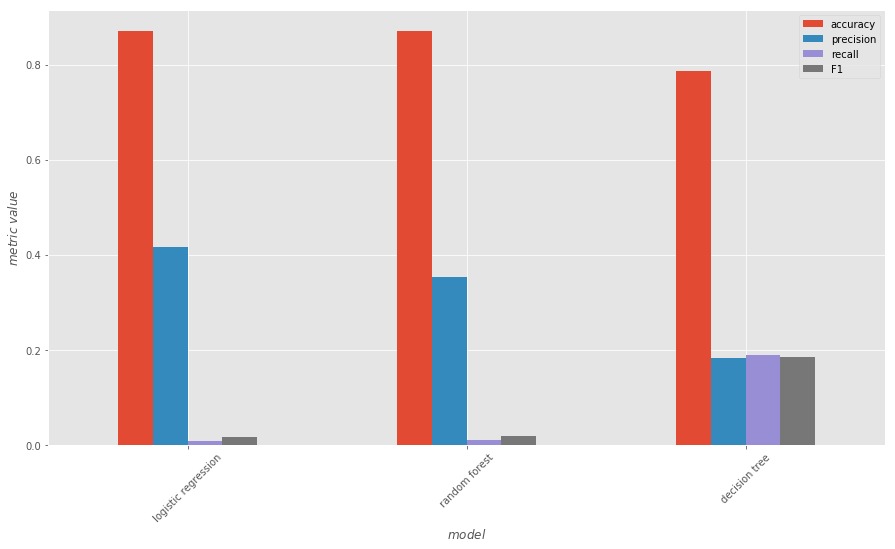

In [29]:
_, ax = plt.subplots(figsize=(15,8))
df_metrics.plot(kind='bar', ax=ax)
plt.xticks(rotation=45)
plt.xlabel('$model$')
plt.ylabel('$metric$ $value$');


#### Задание 7. Заключительное.
#### Выше вы можете выборать самую лучшую модель "коробочку" по метрике F1
#### Теперь вы знаете какой тип коробочки из представленных лучше всего работает на данной задаче
#### Пора: 1) заново объявить эту коробочку
#### 2) обучить на всем X,y
#### 3) протестировать на отложенном X_valid, y_valid

In [30]:
# Взять лучшую модель и сделать предсказания для X_valid выборки

# По мере F1 лучшей моделью вышел классификатор, основанный на деревьях принятия решений, запустим его на всей выборке
tree = DecisionTreeClassifier()
tree.fit(X, y) 
pred_final = tree.predict(X_valid)

In [31]:
# Посчитать метрики на полученном предсказании

final_metrics = accuracy_score(y_valid, pred_final), \
precision_score(y_valid, pred_final), \
recall_score(y_valid, pred_final), \
f1_score(y_valid, pred_final)

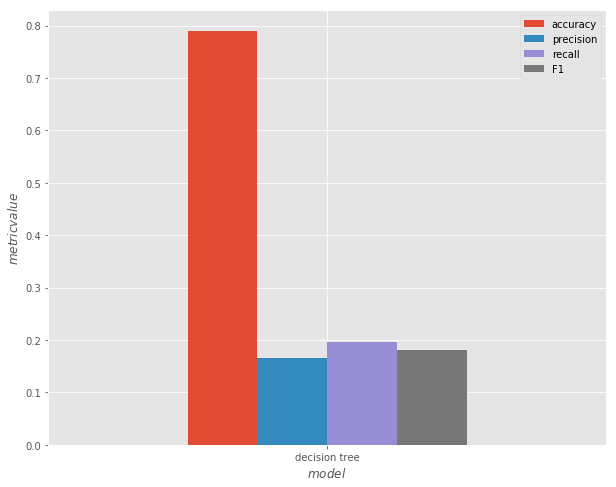

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

df_final_metrics = pd.DataFrame(
    [final_metrics], 
    columns = ['accuracy', 'precision', 'recall', 'F1'],
    index = ['decision tree'])

df_final_metrics.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)

plt.xlabel('$model$')
plt.ylabel('$metric value$');